## Data Preprocessing

In [7]:
!pip install statsmodels

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.8/10.8 MB 58.8 MB/s eta 0:00:00:00:01:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.9/233.9 kB 7.8 MB/s eta 0:00:00


In [8]:
import os
import math
import requests
import pandas as pd
import numpy as np
import csv
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
from statsmodels.graphics.mosaicplot import mosaic

### Notebook Constants
DATA_PATH = "https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data"
COLUMNS = ['age', 'workclass', 'fnlwgt', 'education', 'education-num', 'marital-status', 
            'occupation', 'relationship', 'race', 'sex', 'capital-gain', 
           'capital-loss', 'hours-per-week', 'native-country', 'salary'] # From archive description, fnlwgt will be ignored

In [9]:
req = requests.get(DATA_PATH)

csvreader = csv.reader(req.text, delimiter=",")

In [10]:
def dataToDict(dataText, rowdelimiter="\n", coldelimiter=", "):
    """
    Splits the rows for the data points by the rowdelimiter.
    Splits the column, row-wise 
    """
    rows = dataText.split(rowdelimiter)[:-2] # Final two rows are blank
    return {i: data.split(coldelimiter) for i, data in enumerate(rows)}

In [11]:
customer_data = dataToDict(req.text)
customer_df = pd.DataFrame.from_dict(customer_data, orient='index', columns=COLUMNS)
customer_df = customer_df.drop("fnlwgt", axis=1)
for col in ["age", "education-num", "capital-gain", "capital-loss", "hours-per-week"]: # Cast numerical columns to numerical data type
    customer_df[col] = pd.to_numeric(customer_df[col])

# Clean '?' Values
print(f"before\n {customer_df.isin(['?']).sum().sum()} values")
customer_df = customer_df.replace("?", "none")
print(f"after\n {customer_df.isin(['?']).sum().sum()} values")

before
 4262 values
after
 0 values


## Plotting Marital Status vs. Income

(<Figure size 640x480 with 3 Axes>,
 {('currently-unmarried', '<=50K'): (0.0,
   np.float64(0.0),
   0.5238999560106168,
   np.float64(0.9324378374775014)),
  ('currently-unmarried', '>50K'): (0.0,
   np.float64(0.935760096613714),
   0.5238999560106168,
   np.float64(0.0642399033862859)),
  ('currently-married', '<=50K'): (0.5288750803887262,
   np.float64(0.0),
   0.47112491961127384,
   np.float64(0.5612090204604357)),
  ('currently-married', '>50K'): (0.5288750803887262,
   np.float64(0.5645312795966484),
   0.47112491961127384,
   np.float64(0.43546872040335155))})

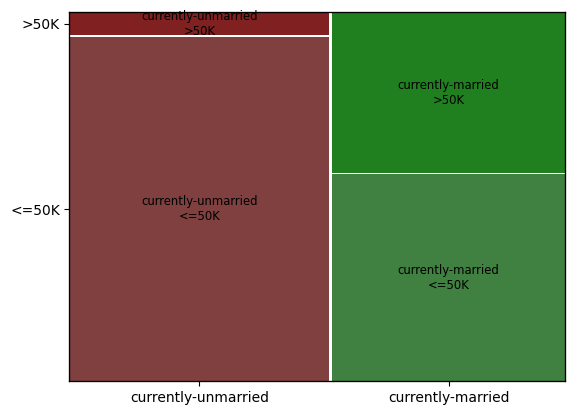

In [12]:
categorical_attributes = ["workclass", "education", "marital-status", "occupation", "relationship", "race", "sex", "native-country"] # These attributes are categorical data

# Create a mosaic plot associating marital status to earning less than or greater than 50K
currently_married = ['Married-civ-spouse', 'Married-AF-spouse', 'Married-spouse-absent']
customer_df["marital-status"] = customer_df["marital-status"].apply(lambda x: "currently-married" if x in currently_married else "currently-unmarried")
mosaic(customer_df, ["marital-status", "salary"])

In [ ]:
# Stacked Bar Chart
import seaborn as sns
temp = customer_df.groupby(['binary-marital-status', 'sex'])['salary'].value_counts().reset_index()
# temp.groupby(['binary-marital-status', 'sex'])['count']
# Calculate the total count for each group of binary-marital-status and sex
group_totals = temp.groupby(['binary-marital-status', 'sex'])['count'].transform('sum')

# Calculate the proportion of each count within its group
temp['proportion'] = temp['count'] / group_totals

# Grouped Bar Chart
sns.catplot(
    data=temp, kind="bar",
    x="binary-marital-status", y="count", hue="salary",
    col="sex", ci=None, height=5, aspect=1
)
plt.subplots_adjust(top=0.9)
plt.suptitle('Count of Salary Levels by Marital Status and Sex')
plt.show()